In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import models.ssmrk as ssmrk
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
# Parameters
abbr = "S06"


In [3]:
preprocess(abbr)
ssmrk_df, pentzer_df = ssmrk.ssmrk_main(abbr)


S06 : Exported merged CSV in data/runs/S06/elec/S06_2022-08-12-16-35-17-VG-RotGrandAxe_elec_motor_data.csv
Primary topic : mcu_status
S06 : Exported merged CSV in data/runs/S06/merged/S06_2022-08-12-16-35-17-VG-RotGrandAxe_m.csv
S06 : Exported cut CSV in data/runs/S06/merged/S06_2022-08-12-16-35-17-VG-RotGrandAxe_mc.csv
Constant columns : 20
['/mcu/status/current_48v', '/warthog_velocity_controller/odom/ang_twi/x', '/warthog_velocity_controller/odom/ang_twi/y', '/warthog_velocity_controller/odom/lin_twi/y', '/warthog_velocity_controller/odom/lin_twi/z', '/warthog_velocity_controller/odom/orientation/pitch', '/warthog_velocity_controller/odom/orientation/roll', '/warthog_velocity_controller/odom/orientation/x', '/warthog_velocity_controller/odom/orientation/y', '/warthog_velocity_controller/odom/position/z', '/imu_and_wheel_odom/ang_twi/x', '/imu_and_wheel_odom/ang_twi/y', '/imu_and_wheel_odom/ang_twi/z', '/imu_and_wheel_odom/lin_twi/y', '/imu_and_wheel_odom/lin_twi/z', '/warthog_veloci

```
axlim = 25
fig, ax = plt.subplots()
ssmrk_df["ICRyL"].plot(ax=ax)
ssmrk_df["ICRyR"].plot(ax=ax)
ax.set_ylim(bottom=-axlim, top=axlim)
```

In [4]:
print(ssmrk_df.columns.values)


['time' 'time_rel' 'vx' 'vy' 'vz' 'w_z' 'current' 'voltage' 'ax' 'ay' 'az'
 'theta' 'qw' 'qx' 'qy' 'qz' 'cmd_v' 'cmd_w' 'wL' 'wR' 'px' 'py' 'pz'
 'I_L' 'I_R' 'V_L' 'V_R' 'ax_corr' 'ay_corr' 'az_corr' 'P_total' 'v' 'a'
 'P_motion' 'ICRx' 'ICRy' 'vL' 'vR' 'ICRyL' 'ICRyR' 'normal_force' 'Bs'
 'dx_front' 'dx_rear' 'dy_left' 'dy_right' 'd_fl' 'd_fr' 'd_rl' 'd_rr'
 'dist_asym' 'dist_sym' 'JS_asym' 'JS_sym' 'JG' 'JB' 'mu_asym' 'G_asym'
 'B_asym' 'mu_sym' 'G_sym' 'B_sym']


In [5]:
mask = ssmrk_df.index >= 10

index = ssmrk_df.index[mask]
power = ssmrk_df.P_total[mask]

mu_asym = ssmrk_df.mu_asym[mask]
G_asym = ssmrk_df.G_asym[mask]
B_asym = ssmrk_df.B_asym[mask]

mu_sym = ssmrk_df.mu_sym[mask]
G_sym = ssmrk_df.G_sym[mask]
B_sym = ssmrk_df.B_sym[mask]


In [6]:
basename = u.get_basename(u.get_filename(abbr))
figdir = u.get_figdir(basename)
ssmrkgifs = figdir / "ssmrk"
# pentzfigs = ssmrkgifs / "ssmr_pentz"

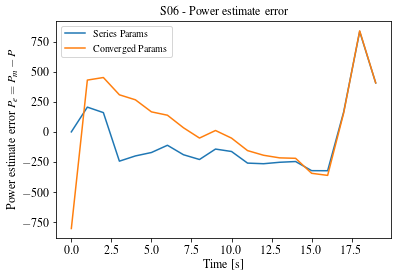

In [7]:
fig, ax = plt.subplots()
pentzer_df.P_err_t.plot(ax=ax, label="Series Params")
pentzer_df.P_err_conv.plot(ax=ax, label="Converged Params")
ax.legend()
ax.set_ylabel("Power estimate error $P_e=P_m - P$")
ax.set_xlabel("Time [s]")
ax.set_title(f"{abbr} - Power estimate error")
fig.savefig(ssmrkgifs / f"{abbr}_Perror.jpg", bbox_inches="tight")

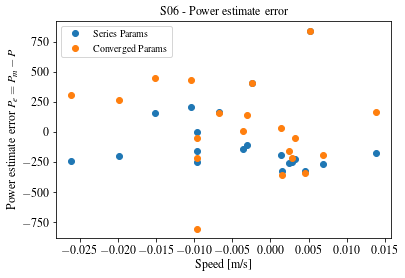

In [8]:
fig, ax = plt.subplots()
ax.plot(pentzer_df.vx, pentzer_df.P_err_t, "o", label="Series Params")
ax.plot(pentzer_df.vx, pentzer_df.P_err_conv, "o", label="Converged Params")
ax.legend()
ax.set_ylabel("Power estimate error $P_e=P_m - P$")
ax.set_xlabel("Speed [m/s]")
ax.set_title(f"{abbr} - Power estimate error")
fig.savefig(ssmrkgifs / f"{abbr}_Perror_vx.jpg", bbox_inches="tight")

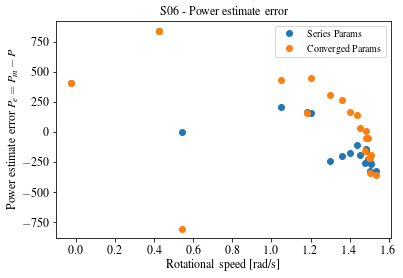

In [9]:
fig, ax = plt.subplots()
ax.plot(pentzer_df.w_z, pentzer_df.P_err_t, "o", label="Series Params")
ax.plot(pentzer_df.w_z, pentzer_df.P_err_conv, "o", label="Converged Params")
ax.legend()
ax.set_ylabel("Power estimate error $P_e=P_m - P$")
ax.set_xlabel("Rotational speed [rad/s]")
ax.set_title(f"{abbr} - Power estimate error")
fig.savefig(ssmrkgifs / f"{abbr}_Perror_wz.jpg", bbox_inches="tight")

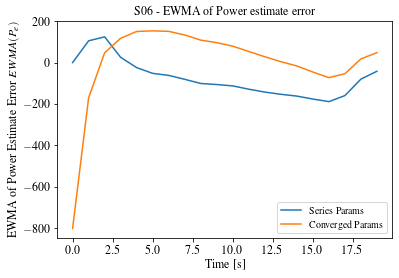

In [10]:
fig, ax = plt.subplots()
pentzer_df.EWMA_t.plot(ax=ax, label="Series Params")
pentzer_df.EWMA_conv.plot(ax=ax, label="Converged Params")
ax.legend()
ax.set_ylabel("EWMA of Power Estimate Error $EWMA(P_e)$")
ax.set_xlabel("Time [s]")
ax.set_title(f"{abbr} - EWMA of Power estimate error")
fig.savefig(ssmrkgifs / f"{abbr}_PEWMA.jpg", bbox_inches="tight")

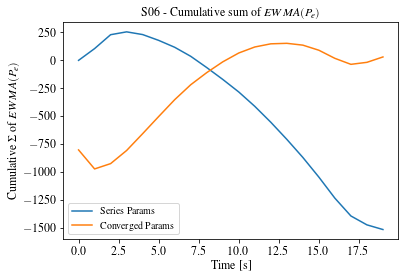

In [11]:
fig, ax = plt.subplots()
pentzer_df.estimator_t.plot(ax=ax, label="Series Params")
pentzer_df.estimator_conv.plot(ax=ax, label="Converged Params")
ax.legend()
ax.set_ylabel("Cumulative $\Sigma$ of $EWMA(P_e)$")
ax.set_xlabel("Time [s]")
ax.set_title(f"{abbr} - Cumulative sum of $EWMA(P_e)$")
fig.savefig(ssmrkgifs / f"{abbr}_PEstimator.jpg", bbox_inches="tight")


In [12]:
from scipy import integrate
import pandas as pd

pentzer_df.index = pd.RangeIndex(len(pentzer_df.index))
pentzer_df["time_rel"] = pentzer_df["time"] - pentzer_df["time"][0]

power = pentzer_df["P_total"]
rel_time = pentzer_df["time_rel"]
pentzer_df["energy_ws"] = integrate.cumulative_trapezoid(power, rel_time, initial=0)
pentzer_df["energy_wh"] = pentzer_df["energy_ws"] / 3600

<AxesSubplot:>

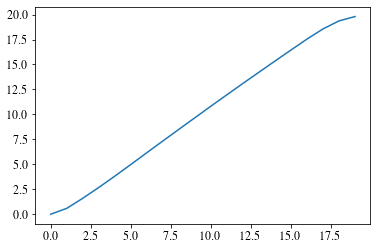

In [13]:
pentzer_df.energy_wh.plot()